In [42]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_csv("Student_Marks.csv")
data.head()


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [43]:
!pip install statsmodels

<AxesSubplot: xlabel='time_study', ylabel='Marks'>

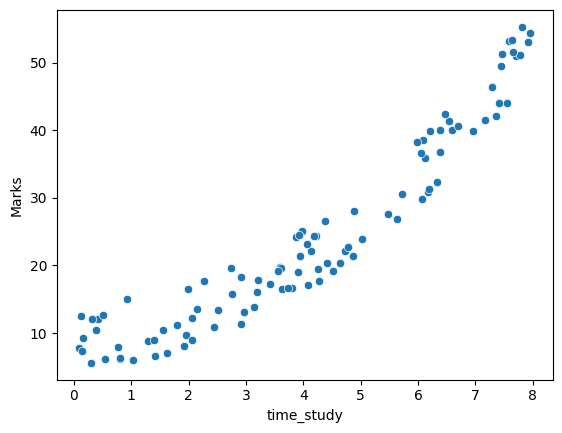

In [44]:
sns.scatterplot(data=data, x="time_study", y="Marks")

# na spodní ose (x) je nezávislá proměnná - mohu si vybrat, jestli budu studovat 1h,2 nebo 8
# na ose y je závislá - závisí na tom, kolik mám bodů

Takové závislosti říkáme korelace (correlation) a to, jak je závislost silná, můžeme popsat pomocí korelačního koeficientu (correlation coefficient). Pro jeho hodnoty platí následující:

Hodnoty blízko +1 znamenají silnou přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.
Hodnoty blízko 0 znamenají lineární nezávislost.
Hodnoty blízko -1 znamenají silnou nepřímou lineární závislost, tj. jedna hodnota roste a současně druhá klesá.
Příklady přímé závislosti: čas strávený studiem a výsledek v testu, délka tréninku a výsledek v závodě, délka praxe a výše mzdy atd. Příklady nepřímé závislosti: množství vypitého alkoholu a kognitivní schopnosti, zimní teploty a spotřeba energie na vytápění.

Hodnotu korelace zjistíme pomocí metody corr() pro zvolenou tabulku.

In [45]:
data.corr()
# v šikmé je vždy 1, koreluje to samé s tím samým

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


In [46]:
# Regresní analýza
# - na ty data se snažíme nasadit lineární křivku 
# protože to nám dává už nějakou sílu 
# popisování mých dat pomocí přímky 
# y = ax + b
# a určuje sklon přímky
# b určuje 

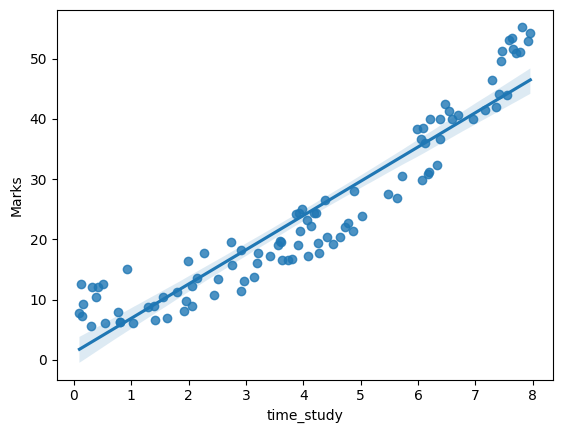

In [47]:
g = sns.regplot(data, x="time_study", y="Marks")

In [48]:
formula = "Marks ~ time_study"  # vysvětlvaná ~ vysvětlující
mod = smf.ols(formula=formula, data=data) #OLS dělá ordinary least squares 
res = mod.fit() # přímku, který popisuje data 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     775.8
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           2.36e-48
Time:                        20:10:09   Log-Likelihood:                -298.21
No. Observations:                 100   AIC:                             600.4
Df Residuals:                      98   BIC:                             605.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2239      0.962      1.272      0.206      -0.686       3.133
time_study     5.6888      0.204     27.853      0.000       5.283       6.094
==============================================================================
Omnibus:                        7.504   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.633
Skew:                           0.357   Prob(JB):                       0.0986
Kurtosis:                       2.225   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# je tam koeficient 
# 1.2 je koeficient s projitím s osou, co byla t hodnota 
# 0. hypotéza je, že koeficient se rovná nule - jestli ji můžeme odmítnout
# u time study - musíme říct, že se nerovná nule a že tedy když strávím studiem o 1h více, tak můžu dostat o 5.7bodu více
# R square - je 0 až 0.88 - jaký je rozptyl


In [50]:
data_to_predict = pd.read_csv("Study_Marks_to_estimate.csv")
data_to_predict

,number_courses,time_study
0,3,5.5
1,4,8.0
2,1,3.0


In [51]:
data_to_predict = pd.read_csv("Study_Marks_to_estimate.csv")
data_to_predict["MarksPredicted"] = res.predict(data_to_predict)
data_to_predict.head()

,number_courses,time_study,MarksPredicted
0,3,5.5,32.511985
1,4,8.0,46.733861
2,1,3.0,18.290109


In [52]:
#Odlehlá pozorování

In [53]:
data = pd.read_csv("house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


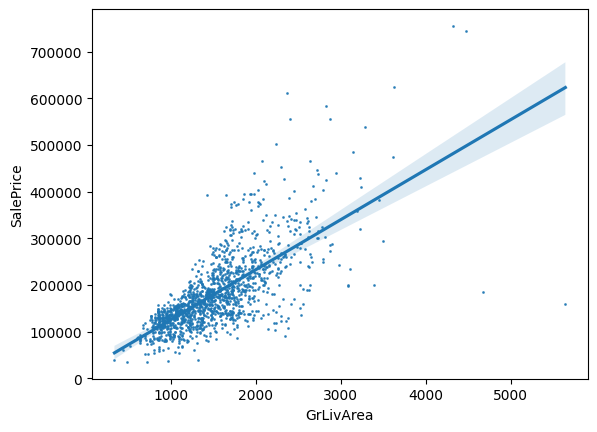

In [54]:
g = sns.regplot(data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1})

In [63]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + YearBuilt + FullBath + HalfBath + GarageArea"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results) # jaký má každý ten bod vliv na koeficienty 
data['Cook Distance'] = influence.cooks_distance[0] # jaký vliv má tento bod na regresní funkci - jak moc by se posunula
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cook Distance
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,8.076745e-06
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,4.591537e-05
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7.333335e-08
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.650177e-03
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5.123639e-04


In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     833.0
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:11:03   Log-Likelihood:                -17355.
No. Observations:                1459   AIC:                         3.473e+04
Df Residuals:                    1451   BIC:                         3.477e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.629e+05   9.08e+04     -9.508      0.000   -1.04e+06   -6.85e+05
OverallQual  1.905e+04   1073.847     17.740      0.000    1.69e+04    2.12e+04
GrLivArea      63.3108      3.420     18.513      0.000      56.602      70.019
TotalBsmtSF    37.7036      3.047     12.372      0.000      31.726      43.681
YearBuilt     399.3179     47.693      8.373      0.000     305.764     492.872
FullBath    -9607.9940   2674.084     -3.593      0.000   -1.49e+04   -4362.511
HalfBath    -1784.6415   2422.955     -0.737      0.462   -6537.511    2968.228
GarageArea     43.9541      5.742      7.654      0.000      32.690      55.218
==============================================================================
Omnibus:                      413.680   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14644.507
Skew:                           0.622   Prob(JB):                         0.00
Kurtosis:                      18.471   Cond. No.                     2.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
data = data[data['Cook Distance'] < 1] # zobraz jen body menší než 1
mod = smf.ols(formula=formula, data=data)
res = mod.fit()

data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cook Distance
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,8.076745e-06
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,4.591537e-05
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7.333335e-08
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.650177e-03
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5.123639e-04


In [66]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     833.0
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:11:05   Log-Likelihood:                -17355.
No. Observations:                1459   AIC:                         3.473e+04
Df Residuals:                    1451   BIC:                         3.477e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.629e+05   9.08e+04     -9.508      0.000   -1.04e+06   -6.85e+05
OverallQual  1.905e+04   1073.847     17.740      0.000    1.69e+04    2.12e+04
GrLivArea      63.3108      3.420     18.513      0.000      56.602      70.019
TotalBsmtSF    37.7036      3.047     12.372      0.000      31.726      43.681
YearBuilt     399.3179     47.693      8.373      0.000     305.764     492.872
FullBath    -9607.9940   2674.084     -3.593      0.000   -1.49e+04   -4362.511
HalfBath    -1784.6415   2422.955     -0.737      0.462   -6537.511    2968.228
GarageArea     43.9541      5.742      7.654      0.000      32.690      55.218
==============================================================================
Omnibus:                      413.680   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14644.507
Skew:                           0.622   Prob(JB):                         0.00
Kurtosis:                      18.471   Cond. No.                     2.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# coef je koeficient odhadu 
# std err - nejistota odhadu
# t počítáme t-test
# P hodnota - že je statisticky signifikacní
# F - test . kde všechny tyto hodoty společně jsou nulové
# R-squared - jaký je rozptyl těch dat


In [60]:
# coef - který koeficinet ovlivňuje tu cenu nejvíc
# existují metody, které se dají kombinovat s lineární regresí

In [61]:
# feature selection algoritmus - odvětví, které se toho týká 

Kvalita betonu
V souboru Concrete_Data_Yeh.csv najdeš informace o kvalitě betonu. Sloupce 1-7 udávají množství jednotlivých složek v kg, které byly přimíchány do krychlového metru betonu (např. cement, voda, kamenivo, písek atd.). Ve sloupci 8 je stáří betonu a ve sloupci 9 kompresní síla betonu v megapascalech. Vytvoř regresní model, který bude predikovat kompresní sílu betonu na základě všech množství jednotlivých složek a jeho stáří. Zhodnoť kvalitu modelu.

Která ze složek betonu ovlivňuje sílu betonu negativně (tj. má záporný regresní koeficient)?

Řešení příkladu je zde. Video s řešením příkladu je zde.


In [85]:
data = pd.read_csv("Concrete_Data_Yeh.csv")
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [86]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "csMPa ~ cement + slag + flyash + water + superplasticizer + coarseaggregate + fineaggregate + age"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,Cook Distance
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.010162
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.000904
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.004950
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.022152
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.009223


In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          6.29e-206
Time:                        23:10:16   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement               0.1198      0.008     14.113      0.000       0.103       0.136
slag                 0.1039      0.010     10.247      0.000       0.084       0.124
flyash               0.0879      0.013      6.988      0.000       0.063       0.113
water               -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
coarseaggregate      0.0181      0.009      1.926      0.054      -0.000       0.037
fineaggregate        0.0202      0.011      1.887      0.059      -0.001       0.041
age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Kvalita modelu OLS (Ordinary Least Squares) pro predikci pevnosti betonu v MPa lze hodnotit na základě několika klíčových statistik, které byly poskytnuty ve výstupu modelu.

# R-squared (R²) = 0.616 a Adjusted R-squared = 0.613: Tyto hodnoty ukazují, že model vysvětluje zhruba 61.6% variability pevnosti betonu, což je slušný výsledek pro real-world data v oblasti stavebnictví. Přestože model je užitečný, existují pravděpodobně i další faktory nezahrnuté v modelu, které mohou pevnost betonu ovlivňovat.
# F-statistika: Hodnota 204.3 s extrémně nízkou p-hodnotou (6.29e-206) ukazuje, že model je jako celek statisticky významný. To znamená, že alespoň některé z vysvětlujících proměnných mají signifikantní vliv na pevnost betonu.
# Koeficienty: Většina koeficientů má pozitivní hodnoty, což ukazuje, že zvyšují pevnost betonu. Výjimkou je voda, jejíž koeficient je záporný.
# Durbin-Watson: Hodnota 1.282 naznačuje možnou mírnou pozitivní autokorelaci mezi rezidui, což může být znepokojivé a může naznačovat, že model by mohl být vylepšen, například přidáním dalších proměnných nebo upravením stávajících prediktorů.
# P-hodnoty koeficientů: Zatímco většina koeficientů je statisticky významná, koeficienty pro coarseaggregate a fineaggregate jsou hraniční (p-hodnoty 0.054 a 0.059). Toto může naznačovat, že jejich přesný vliv na pevnost betonu není tak jednoznačný.


# Složka betonu, která ovlivňuje sílu betonu negativně:
# Voda (water): Koeficient pro vodu je -0.1499, což znamená, že s každým přidaným litrem vody na kubický metr betonu se pevnost betonu snižuje o 0.1499 MPa.
# Tento negativní vliv vody je logický, neboť nadměrné množství vody může snížit pevnost betonu tím, že zvyšuje pórovitost a snižuje celkovou hustotu betonové směsi.
# Závěrem, model má dobrou prediktivní schopnost a je statisticky významný, ale je možné, že by mohl být dále vylepšen pro dosažení lepších predikcí, zejména co se týče modelování vlivu vody a kameniva na pevnost betonu.

# Koeficienty:
# Intercept (konstanta): -23.3312, p-hodnota je 0.380, což naznačuje, že konstanta není statisticky významná.
# - cement: Za každý kilogram cementu na kubický metr betonu se pevnost zvyšuje o 0.1198 MPa, p < 0.001.
# - slag (struska): Za každý kilogram strusky na kubický metr betonu se pevnost zvyšuje o 0.1039 MPa, p < 0.001.
# - flyash (letový popílek): Za každý kilogram letového popílku na kubický metr betonu se pevnost zvyšuje o 0.0879 MPa, p < 0.001.
# - water (voda): Za každý litr vody na kubický metr betonu se pevnost snižuje o 0.1499 MPa, p < 0.001.
# - superplasticizer: Za každý kilogram superplastifikátoru na kubický metr betonu se pevnost zvyšuje o 0.2922 MPa, p = 0.002.
# - coarseaggregate (hrubý kámen): Za každý kilogram hrubého kameniva na kubický metr betonu se pevnost zvyšuje o 0.0181 MPa, p = 0.054 (hraničně statisticky významný).
# - fineaggregate (jemné kamenivo): Za každý kilogram jemného kameniva na kubický metr betonu se pevnost zvyšuje o 0.0202 MPa, p = 0.059 (hraničně statisticky významný).
# - age (stáří): Za každý den stárnutí betonu se pevnost zvyšuje o 0.1142 MPa, p < 0.001.

# Model je statisticky významný a některé proměnné mají silný vliv na pevnost betonu, jako je stáří betonu, cement, struska a letový popílek.
# Voda a superplastifikátory mají také značný vliv, ale opačným směrem (voda snižuje pevnost).

In [88]:
data = pd.read_csv("expenses.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "charges ~ age + bmi"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,age,sex,bmi,children,smoker,region,charges,Cook Distance
0,19,female,27.900,0,yes,southwest,16884.92400,0.000541
1,18,male,33.770,1,no,southeast,1725.55230,0.000401
2,28,male,33.000,3,no,southeast,4449.46200,0.000170
3,33,male,22.705,0,no,northwest,21984.47061,0.000893
4,32,male,28.880,0,no,northwest,3866.85520,0.000127


In [90]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           7.39e-37
Time:                        23:10:17   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6424.8046   1744.091     -3.684      0.000   -9846.262   -3003.347
age          241.9308     22.298     10.850      0.000     198.187     285.674
bmi          332.9651     51.374      6.481      0.000     232.182     433.748
==============================================================================
Omnibus:                      321.874   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.574
Skew:                           1.511   Prob(JB):                    2.11e-129
Kurtosis:                       4.223   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Výsledky regresní analýzy pomocí metody nejmenších čtverců (OLS) pro závislou proměnnou "charges" (platby za pojištění) ukazují, jak věk a BMI (body mass index) ovlivňují výši plateb za pojištěnce.
# Model využívá pouze tyto dvě nezávislé proměnné a jeho charakteristiky jsou následující:

# R-squared (R²) = 0.117: Tato hodnota indikuje, že model dokáže vysvětlit pouze 11.7% variability v platbách za pojištěnce na základě věku a BMI. Toto je relativně nízké číslo, což naznačuje, že model nepokrývá mnoho faktorů ovlivňujících platby za pojištění.
# Adjusted R-squared (Adj. R²) = 0.116: Upravený koeficient determinace je velmi blízký R², což ukazuje, že model není zatížen nadbytečným počtem proměnných. I tak jeho prediktivní schopnost zůstává nízká.
# F-statistika = 88.60 s p-hodnota = 7.39e-37: Tato statistika a velmi nízká p-hodnota ukazují, že model jako celek je statisticky významný. To znamená, že alespoň jeden z koeficientů (věk nebo BMI) má statisticky významný vliv na platby za pojištěnce.

# Koeficienty:
# Intercept (konstanta): -6424.8046 s p-hodnotou < 0.001. Intercept je statisticky významný, ale jeho negativní hodnota není prakticky interpretabilní bez dalších kontextových informací.
# Věk (age): Koeficient 241.9308 znamená, že s každým rokem se očekávané platby za pojištěnce zvyšují o přibližně 241.93 dolarů, p-hodnota < 0.001.
# BMI (bmi): Koeficient 332.9651 naznačuje, že s každým bodem BMI se platby za pojištěnce zvyšují o 332.97 dolarů, p-hodnota < 0.001.

# Diagnostika reziduí:
# Omnibus test: Výsledek testu je statisticky významný (p < 0.001), což naznačuje, že rezidua nejsou normálně distribuovaná.
# Durbin-Watson: Hodnota 2.010 naznačuje, že mezi rezidui není žádná autokorelace.
# Skew (šikmost) a Kurtosis (špičatost): Hodnoty ukazují, že distribuce reziduí má vyšší špičatost a je více šikmá než normální distribuce.

# Zhodnocení modelu
# I přesto, že F-statistika ukazuje, že model je celkově statisticky významný, jeho nízké R-squared hodnoty naznačují, že model je relativně slabý v predikci plateb za pojištěnce. To může být způsobeno vyloučením jiných významných proměnných, jako jsou kuřák/nekuřák, pohlaví, počet dětí nebo region, které mohou mít zásadní vliv na platby za pojištění. Zlepšení modelu by mohlo zahrnovat zahrnutí těchto dalších proměnných a testování interakcí mezi nimi, aby bylo dosaženo vyšší prediktivní schopnosti.

In [91]:
labels = {0: "no", 1: "yes"}
#data["smoker_number"] = data["smoker"]
cisla = np.where(data["smoker"] =='yes',1,0)
pole = pd.Series(cisla)
data["smoker_number"] = pole
data.head()

,age,sex,bmi,children,smoker,region,charges,Cook Distance,smoker_number
0,19,female,27.900,0,yes,southwest,16884.92400,0.000541,1
1,18,male,33.770,1,no,southeast,1725.55230,0.000401,0
2,28,male,33.000,3,no,southeast,4449.46200,0.000170,0
3,33,male,22.705,0,no,northwest,21984.47061,0.000893,0
4,32,male,28.880,0,no,northwest,3866.85520,0.000127,0


In [92]:
smoker = pd.get_dummies(data["smoker"])
smoker

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [93]:
data = pd.merge(data, smoker, left_index=True, right_index=True)
data

,age,sex,bmi,children,smoker,region,charges,Cook Distance,smoker_number,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0.000541,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.000401,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0.000170,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0.000893,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0.000127,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.000089,0,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0.000266,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,0.000666,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0.000165,0,1,0


In [39]:
# V tomto modelu OLS (Ordinary Least Squares) bylo k prediktorům věk a BMI přidáno binární kódování (One Hot Encoding) pro proměnnou "kuřák" (yes). Výsledky regrese ukazují výrazné zlepšení v predikční schopnosti modelu v porovnání s předchozím modelem, který zahrnoval pouze věk a BMI.

# Výsledky modelu
# R-squared (R²) = 0.747 a Adjusted R-squared = 0.747: Tento model vysvětluje 74.7% variability v platbách za pojištěnce, což je výrazné zlepšení oproti předchozímu modelu. Tato hodnota naznačuje, že model je velmi efektivní v popisu vztahů mezi závislou proměnnou a vysvětlujícími proměnnými.
# F-statistika = 1316 s p-hodnota = 0.00: Extrémně nízká p-hodnota ukazuje, že model jako celek je statisticky významný a poskytuje silnou evidenci, že alespoň jeden z prediktorů má významný vliv na výši plateb za pojištění.

# Koeficienty:
# Intercept (konstanta): -11680, indikuje základní platby za pojištěnce pro nekuřáky s danými hodnotami BMI a věku rovnými nule.
# - yes[T.True] (kuřák): Koeficient 23820 znamená, že kuřáci platí průměrně o 23820 dolarů více než nekuřáci, což je velmi výrazný rozdíl, p-hodnota < 0.001.
# - Věk (age): Každý rok navíc zvyšuje platby za pojištění o přibližně 259.55 dolarů.
# - BMI (bmi): Každý bod BMI zvyšuje platby o 322.62 dolarů.

# Diagnostika reziduí:
# Omnibus test a Jarque-Bera (JB) test: Oba testy jsou statisticky významné a naznačují, že rezidua nejsou normálně distribuovaná.
# Durbin-Watson: Hodnota 2.077 naznačuje, že autokorelace mezi rezidui je minimální.

# Zhodnocení modelu
# Přidání proměnné "kuřák" významně zlepšilo prediktivní schopnosti modelu, což ukazuje, že fakt, zda je osoba kuřákem, má významný dopad na výši plateb za zdravotní pojištění.
# Vysoké R-squared hodnoty a výrazné koeficienty naznačují, že model je velmi účinný v odhadu plateb.
# Avšak nízká normalita reziduí by mohla být znepokojivá pro některé typy dalších analýz a může znamenat, že modelování rozdělení plateb může vyžadovat pokročilejší metody, jako je transformace proměnných nebo použití jiných typů regresních modelů.

In [94]:
formula = "charges ~ age + bmi + smoker_number"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,age,sex,bmi,children,smoker,region,charges,Cook Distance,smoker_number,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0.002972,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.000096,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0.000035,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0.004880,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0.000035,0,1,0


In [95]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:10:20   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
age             259.5475     11.934     21.748      0.000     236.136     282.959
bmi             322.6151     27.487     11.737      0.000     268.692     376.538
smoker_number  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# O kolik se zvýšil koeficient determinace?
# zvýšil se z -6424.8046 age	241.9308 bmi	332.9651 na -1.168e+04 age	259.5475 bmi	322.6151	

In [97]:
formula = "charges ~ age + bmi + yes"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,age,sex,bmi,children,smoker,region,charges,Cook Distance,smoker_number,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0.002972,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.000096,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0.000035,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0.004880,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0.000035,0,1,0


In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:10:22   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
age          259.5475     11.934     21.748      0.000     236.136     282.959
bmi          322.6151     27.487     11.737      0.000     268.692     376.538
yes         2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
### Čtení na doma: Robustní regrese

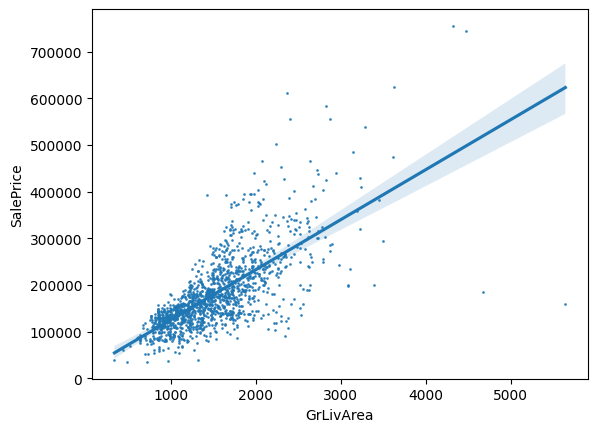

In [13]:
data = pd.read_csv("house_prices.csv")
g = sns.regplot(data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1})

In [14]:
formula = "SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + YearBuilt + FullBath + HalfBath + GarageArea"
mod = smf.rlm(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            RLM   Df Residuals:                     1452
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 28 Apr 2024                                         
Time:                        17:06:23                                         
No. Iterations:                     6                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.516e+05   6.52e+04    -13.054      0.000    -9.8e+05   -7.24e+05
OverallQual   1.68e+04    766.452     21.916      0.000    1.53e+04    1.83e+04
GrLivArea      58.1283      2.431     23.913      0.000      53.364      62.893
TotalBsmtSF    31.4140      2.127     14.766      0.000      27.244      35.584
YearBuilt     405.2442     34.289     11.818      0.000     338.039     472.450
FullBath    -7314.6164   1910.839     -3.828      0.000   -1.11e+04   -3569.440
HalfBath    -3183.1509   1742.865     -1.826      0.068   -6599.103     232.801
GarageArea     43.4179      4.130     10.513      0.000      35.323      51.513
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [15]:
### Transformace dat


In [16]:
data = pd.read_csv("Life-Expectancy-Data-Updated.csv")
data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,Economy_status
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,developing
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,developed
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,developing
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,developing
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,developed


<AxesSubplot: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

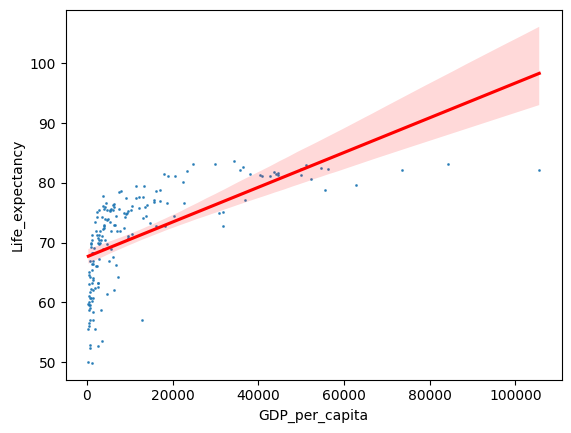

In [17]:
data = data[data["Year"] == 2014]
sns.regplot(data, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

<AxesSubplot: xlabel='GDP_per_capita', ylabel='Life_expectancy'>

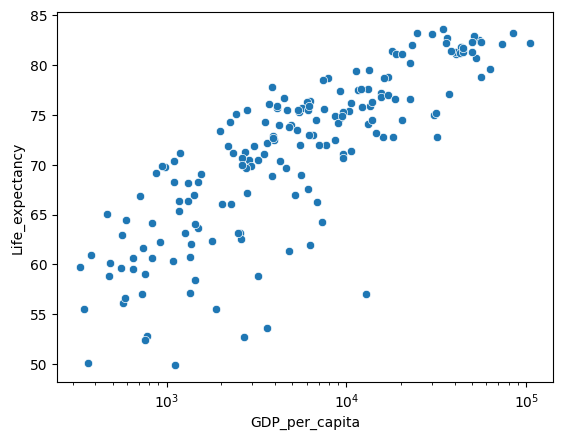

In [18]:
plt.xscale('log')
sns.scatterplot(data, x="GDP_per_capita", y="Life_expectancy")

<AxesSubplot: xlabel='log_GDP_per_capita', ylabel='Life_expectancy'>

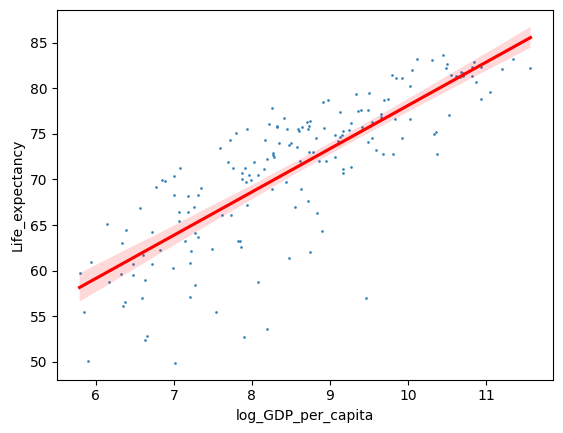

In [19]:
data["log_GDP_per_capita"] = np.log(data["GDP_per_capita"])
sns.regplot(data, x="log_GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})

In [20]:
formula = "Life_expectancy ~ log_GDP_per_capita"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     362.8
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           1.01e-44
Time:                        17:20:36   Log-Likelihood:                -527.14
No. Observations:                 179   AIC:                             1058.
Df Residuals:                     177   BIC:                             1065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             30.6788      2.156     14.228      0.000      26.424      34.934
log_GDP_per_capita     4.7435      0.249     19.047      0.000       4.252       5.235
==============================================================================
Omnibus:                       42.394   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.513
Skew:                          -1.177   Prob(JB):                     6.60e-17
Kurtosis:                       5.109   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
formula = "Life_expectancy ~ log_GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           6.22e-67
Time:                        17:20:45   Log-Likelihood:                -462.83
No. Observations:                 179   AIC:                             937.7
Df Residuals:                     173   BIC:                             956.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             29.0217      3.693      7.859      0.000      21.733      36.311
log_GDP_per_capita     2.8762      0.305      9.424      0.000       2.274       3.479
Schooling              0.4516      0.144      3.131      0.002       0.167       0.736
Incidents_HIV         -1.5116      0.143    -10.581      0.000      -1.794      -1.230
Polio                  0.1328      0.021      6.315      0.000       0.091       0.174
BMI                    0.1228      0.144      0.852      0.395      -0.162       0.407
==============================================================================
Omnibus:                        5.821   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.424
Skew:                          -0.400   Prob(JB):                       0.0664
Kurtosis:                       3.294   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regrese funguje na principu minimalizace druhé mocniny součtu reziduí. Tj. vypočtené koeficienti minimalizují druhou mocninu součtu reziduí. Proto je tato metoda často označována jako metoda nejmenších čtverců (OLS - Ordinary Least Squares).

## Čtení na doma

K logaritmické transformaci je třeba dodat, že ji lze použít pouze pro kladné hodnoty. Pokud jsou v datech nuly, je možné použít například funkci `log1p()`.

Další možnou transformací, kterou lze na data použít, je například transformace označovaná jako [Winsorizing](https://en.wikipedia.org/wiki/Winsorizing#:~:text=Winsorizing%20or%20winsorization%20is%20the,as%20clipping%20in%20signal%20processing.). Ta zbaví čísla odlehlých hodnot tak, že je nahradí určitým percentilem.

Jak vlastně regrese funguje? Přidejme si do tabulky `data` dva sloupce:

- `fittedvalues` (vyrovnané hodnoty) jsou hodnoty odhadované modelem, tj. cena domu, kterou by predikoval náš model na základě jeho velikosti,
- `resid` (rezidua) je rozdíl mezi skutečnou cenou domu a predikovanou cenou.

V tabulce níže například vidíme, že v Saudské Arábii byla střední délka dožití 74.5 let a náš model predikovat 78.14 let, tj. zmýlil se o cca tří a půl roku.
                                                                                                              

In [24]:
data["residuals"] = res.resid # rozdíl mezi skutečnou cenou domu a predikovanou
data["predictions"] = res.fittedvalues # jsou hodnoty odhadované modelem, tj. cena domu, kterou by predikoval náš model na základě jeho velikosti,
data[["Country", "Life_expectancy", "residuals", "predictions"]].head()

,Country,Life_expectancy,residuals,predictions
36,Saudi Arabia,74.5,-3.635767,78.135767
40,Singapore,82.5,1.427102,81.072898
44,Costa Rica,79.4,4.500963,74.899037
47,Austria,81.5,0.221308,81.278692
72,Argentina,75.9,-0.313423,76.213423


Pro regresi je dále důležité, aby rezidua měla normální rozdělení. Pro testování normality je možné využít standardní testy, modul statsmodels nám nabízí výsledky dvou testů: Omnibus testu a Jarque-Bera testu. Oba fungují na základě tvaru distribuční funice - šikmosti (jak moc je hustota symetrická) a špičatosti (jak rychle hustota od středu klesá). Poskytnuté p-hodnoty (ty jsou vždy označené jako Prob.) jsou v obou případech větší než 0.05, nezamítáme tedy hypotézu normality reziduí.


<AxesSubplot: ylabel='Count'>

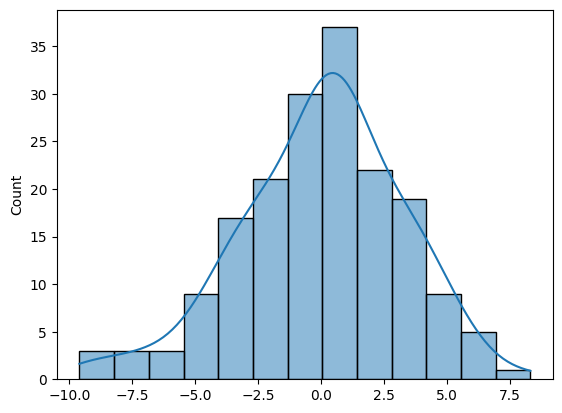

In [25]:
sns.histplot(res.resid, kde=True)

Normalita reziudí nám umožní použít řady údajů, které nám modul vypočítal. Dvě z nich jsou následující:

F-statistic - testuje hypotézu, zda je model statisticky významný jako celek. To oceníme hlavně v případě modelu s více proměnnými. Pokud by byla p-hodnota více než 0.05, je model statisticky nevýznamný (tj. nic nám neříká).
P>|t| - testuje hypotézu, zda je statisticky významný konkrétní koeficient (o něm už jsme mluvili).
Použít ale můžeme základní měřítko kvality modelu, což je koeficient determinace R-squared. Ten nám říká, kolik procet rozptylu vysvětlované proměnné jsme naším modelem vysvětlili.

Více informací najdete například v tomto článku.


### Časové řady

Jako časovou řadu můžeme obecně označit taková data, která obsahují informace o datu a čase a tyto hodnoty v datech hrají významnou roli. Časovými řadami mohou být informace o teplotách, nám již známá měření kvality vzduchu, počty lidí ve veřejné dopravě, počtu nezaměstnaných osob atd.

Časové řady se obecně skládají z následujících komponent:

- trendu, což je výsledek nějakého dlouhodobého procesu (např. růst počtu obyvatel města, klimatické změny atd.),
- sezózní nebo cyklické složky, což jsou opakující se výkyvy krátkodobého (dny v týdnu, měsíce, roční období)
nebo dlouhodobého (ekonomické cykly),
- náhodná složky, která má nahodilý charakter (např. aktuální počasí, dopravní situace atd.).

Pro analýzu časových řad existuje mnoho různých přístupů.

- Pro "vyrovnání" (vyrovnání sezónních výkyvů) se používají klouzavé průměry.
- Dekompozice časové řady dokáže rozložit časovou řadu na její jednotlivé složky. Cílem je eliminovat náhodnou složku.
- Box-Jenkinsonova metoda je naopak zaměřená na zkoumání náhodné složky. Využívá tzv. ARMA (Autoregressive Moving Average) model či jeho varianty.

#### Klouzavé průměry

Jednou ze základních technik ke zpracování časových řad jsou klouzavé průměry (moving averages), což jsou průměry počítané z více hodnot, většinou bezprostředně následujících. Snahou klouzavých průměrů je vyrovnat časovou řadu, neboli eliminovat náhodnou či sezónní složku.

V souboru `AirPassengers.csv` jsou informace o počtu lidí přepravených letadly od začátku roku 1947.

<AxesSubplot: xlabel='Month'>

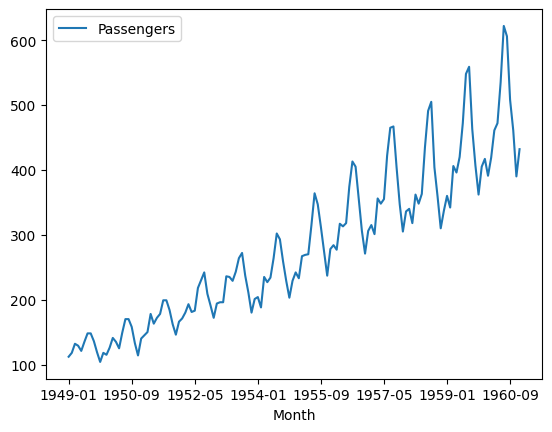

In [26]:
data = pd.read_csv("AirPassengers.csv")
data = data.rename({"#Passengers": "Passengers"}, axis=1)
data = data.set_index("Month")
data.plot()

Pro výpočet klouzavého průměru musíme určit délku jedné sezóny. Ta zpravidla vychází z logiky časové jednotky - u denních dat to bývá 7 dní, u měsíčních dat 12 měsíců. Zkusme tedy použít metodu rolling() modulu pandas k výpočtu klouzavých průměrů.


Tento typ klouzavých průměrů je někdy označován jako SMA (Simple Moving Average).

<AxesSubplot: xlabel='Month'>

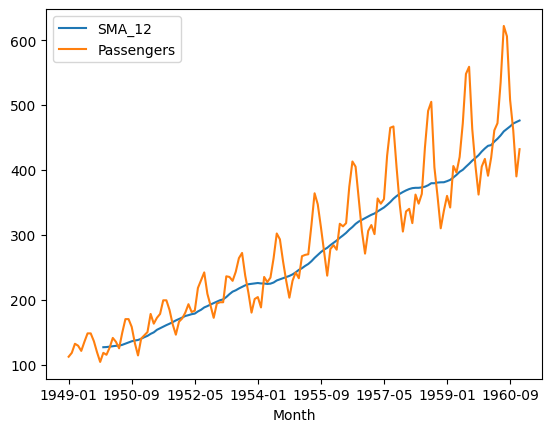

In [28]:
data["SMA_12"] = data["Passengers"].rolling(12).mean()
data[["SMA_12", "Passengers"]].plot()


Pokud bychom chtěli mít klouzavé průměry pro celou časovou řadu, použijeme parametr `min_periods`. Klouzavé průměry jsou pak dopočteny i v případě, že je k dispozici méně hodnot. Při nastavení `min_periods=1` je první hodnota klouzavého průměru rovná první skutečné hodnotě, protože z jiných hodnot ji dopočítat nelze.

<AxesSubplot: xlabel='Month'>

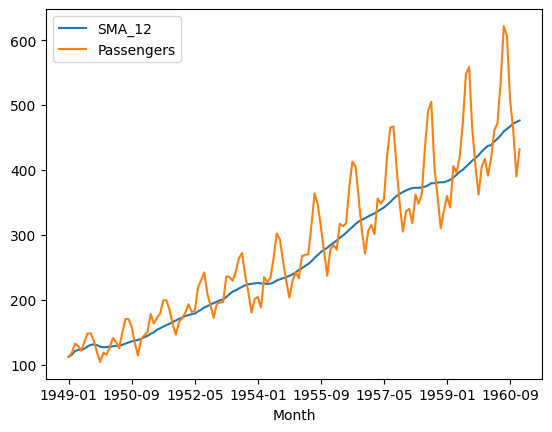

In [30]:
data["SMA_12"] = data["Passengers"].rolling(12, min_periods=1).mean()
data[["SMA_12", "Passengers"]].plot()

Vedle jednoduchých klouzavých průměrů existují centrované klouzavé průměry, kde je hodnota průměru umístěna uprostřed periody. Při naší délce periody 12 je tak klouzavý průměr vypočítán z 6 předcházejících a 6 následujících hodnot.

Určitou nevýhodou centrovaných klouzavých průměrů je, že nikdy neznáme jich hodnotu pro nejnovější hodnoty časové řady (pokud neuvažujeme použití parametru `min_periods`).


<AxesSubplot: xlabel='Month'>

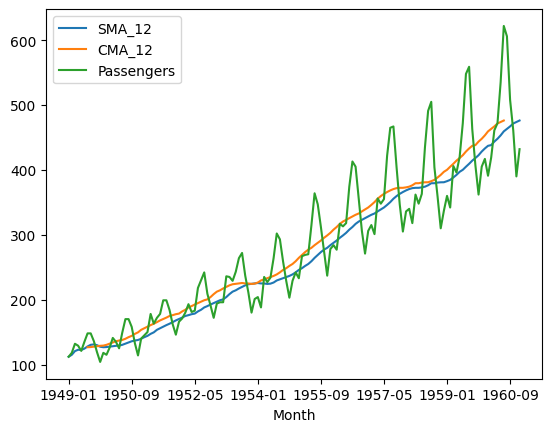

In [31]:
data["CMA_12"] = data["Passengers"].rolling(12, center=True).mean()
data[["SMA_12", "CMA_12", "Passengers"]].plot()

### Exponenciální vyrovnávání

Dalším populárním přístupem je exponenciální vyrovnávání (Exponential Moving Averages - EMA). Metoda funguje následujícím způsobem:

1. Jako první hodnotu vyrovnané řady použiju skutečně pozorovanou hodnotu.
1. Jako druhou a další metodu použiju vážený průměr minulé hodnoty vyrovnané řady a
pozorované hodnoty aktuální řady.

U exponenciálního vyrovnávání nastavujeme vyrovnávací konstantu $\alpha$.

Výpočet lze popsat následujícím vzorcem: $EMA_t = \alpha \cdot x_t + (1 - \alpha) EMA_{t-1} $, kde $x_t$ je pozorované hodnota v čase $t$. Ze vzorce plyne, že čím vyšší je hodnota $\alpha$, tím větší váhu má aktuální hodnota oproti vyrovnané řadě.


<AxesSubplot: xlabel='Month'>

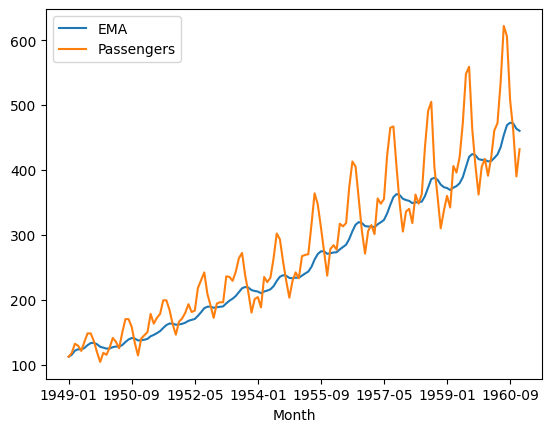

In [33]:
data["EMA"] = data["Passengers"].ewm(alpha=0.1).mean()
data[["EMA", "Passengers"]].plot()

#### Dekompozice časové řady

Tzv. **dekompozice** časové řady se snaží rozložit hodnoty na jednotlivé komponenty pomocí regrese.

Při dekompozici časové řady můžeme použít dva modely: aditivní a multiplikativní.

V aditivním modelu jsou všechny kopomenty časové řady sčítány

$$ y_t = t_t + s_t + \epsilon_t $$

a v multiplikativním modelu násobeny

$$ y_t = t_t \cdot s_t \cdot \epsilon_t \, . $$

K dekompozici můžeme použít modul `statsmodels`, konkrétně funkci `seasonal_decompose()`.

Nejprve zkusíme řadu modelovat pomocí aditivního modelu. Důležité je nastavit parametr `period`, který opět udává délku sezónního cyklu.

V případě aditivního modelu uvažujeme, že sezónní výkyvy jsou v absolutní hodnotě stejné.

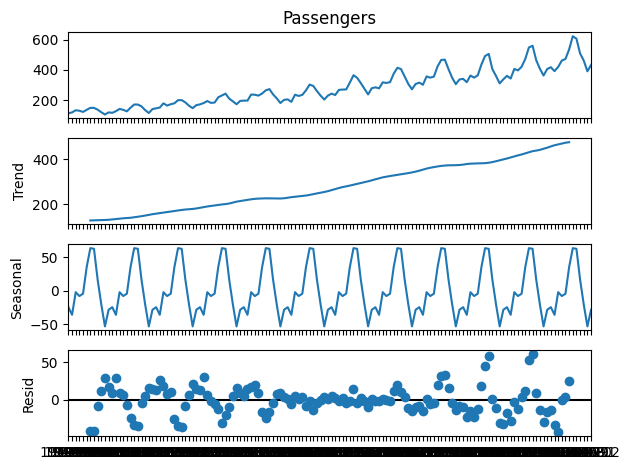

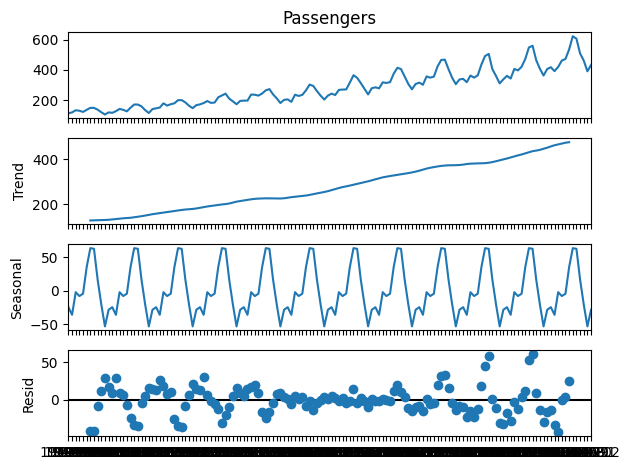

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data['Passengers'], model='additive', period=12)
decompose.plot()

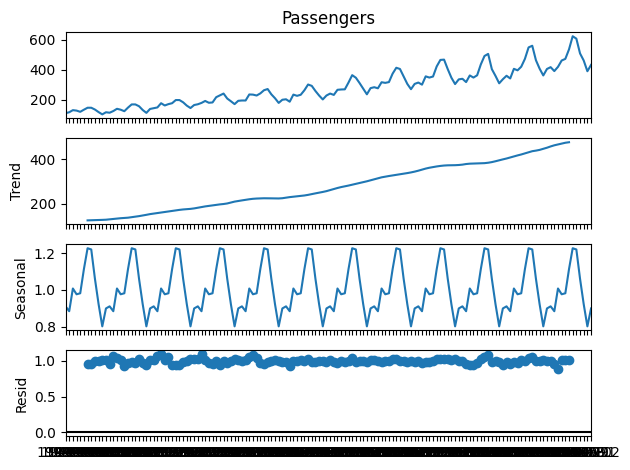

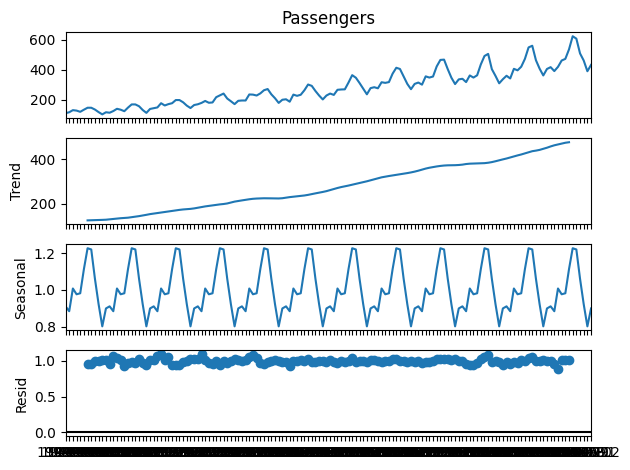

In [36]:
decompose = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decompose.plot()